In [1]:
import pandas as pd

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:107: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
df = pd.read_csv("Data/test_iiee.csv", index_col = 0)

In [5]:
df

,IIEE
date,
2021-01-04,133981
2021-01-05,115135
2021-01-06,159178
2021-01-07,108520
2021-01-11,65339
...,...
2021-12-22,57277
2021-12-27,69757
2021-12-28,63702


array([[<AxesSubplot:title={'center':'IIEE'}>]], dtype=object)

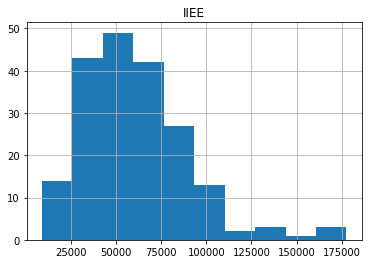

In [19]:
df.hist('IIEE')

In [14]:
monthly_mean = df.groupby(pd.PeriodIndex(df.index, freq="M"))['IIEE'].mean()

<AxesSubplot:xlabel='date'>

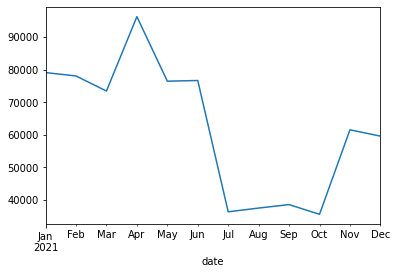

In [15]:
monthly_mean.plot()

In [20]:
five_largest = df.nlargest(n=5, columns='IIEE')
five_smallest = df.nsmallest(n=5, columns='IIEE')

In [18]:
five_largest

,IIEE
date,
2021-04-13,177461
2021-04-12,176530
2021-06-03,163678
2021-01-06,159178
2021-04-14,142863


In [22]:
five_smallest

,IIEE
date,
2021-07-22,9227
2021-08-10,14405
2021-07-15,15843
2021-09-30,17346
2021-12-30,21675
